### 붓꽃(Iris) 데이터 셋을 이용한 클러스터 평가
* 한글표시

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and di

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

### 붓꽃 데이터셋 로드 

In [16]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [38]:
def get_dataset():
  """
  붓꽃 데이터셋의 데이터와 데이터프레임 리턴
  """
  iris = load_iris()
  display(iris.feature_names)

  cols = [feature.replace(' (cm)', '').replace(' ', '_') for feature in iris.feature_names]
  display("Columns : ", cols)

  irisDF = pd.DataFrame(data = iris.data, columns = cols)
  X = iris.data
  display(irisDF.head(5))

  return irisDF, iris.data

  irisDF, X = get_dataset()

### 클러스터 수행
* 실루엣계수 및 점수 확인

In [44]:
#1.군집화 수행 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF) # fit_predict()결과와 동일하게 군집화 레이블 값을 리턴

display(f'군집화 레이블 : {kmeans.labels_}')
irisDF['cluster'] = kmeans.labels_

#2.실루엣 샘플크기 및 형태파악
score_samples = silhouette_samples(X, irisDF['cluster'])
display(f"{score_samples.shape[0]}, 형태: {type(score_samples)}")

#3.실루엣 평균접수 
avg_score = silhouette_score(X, irisDF['cluster'], random_state=0)
display(f"실루엣 평균점수 : {avg_score: .2f}")
irisDF['silhouette_coeff'] = score_samples

display(irisDF.head(5))

'군집화 레이블 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2\n 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1\n 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1\n 1 2]'

"150, 형태: <class 'numpy.ndarray'>"

'실루엣 평균점수 :  0.55'

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315
3,4.6,3.1,1.5,0.2,0,0.805014
4,5.0,3.6,1.4,0.2,0,0.849302


In [45]:
def process_kmeans(X):
  """
  실루엣평균점수와 클러스터 레이블이 포함된 
  데이터셋 리턴
  """
  kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
  kmeans.fit(irisDF)  # fit_predict()메소드는 군집화 레이블값을 리턴

  display(f"Cluster labels : {kmeans.labels_}")
  irisDF['cluster'] = kmeans.labels_

  score_samples = silhouette_samples(X, irisDF['cluster'])
  display(f"실루엣 샘플 크기 : {score_samples.shape[0]}, type : {type(score_samples)}")

  average_score = silhouette_score(X, irisDF['cluster'])
  display(f"실루엣 평균점수 : {average_score : .2f}")
  irisDF["silhouette_coeff"] = score_samples
  display(irisDF.head(5))
  display(irisDF.tail(5))
  return irisDF

# 클러스터 수행
irisDF = process_kmeans(X)

'Cluster labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2\n 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2\n 2 1]'

"실루엣 샘플 크기 : 150, type : <class 'numpy.ndarray'>"

'실루엣 평균점수 :  0.55'

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852955
1,4.9,3.0,1.4,0.2,0,0.815495
2,4.7,3.2,1.3,0.2,0,0.829315
3,4.6,3.1,1.5,0.2,0,0.805014
4,5.0,3.6,1.4,0.2,0,0.849302


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,1,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454
149,5.9,3.0,5.1,1.8,1,0.185442


* Read Evaluate Print Loop for Clustering with Kmeans

* 클러스터링의 결과 실루엣 계수 시각화 

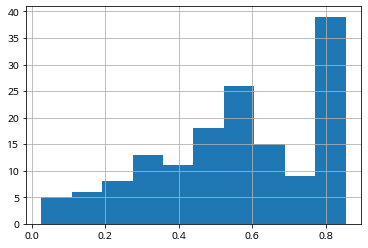

In [46]:
irisDF["silhouette_coeff"].hist()

* 군집별 평균

In [47]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette_coeff, dtype: float64

### 사이킷런에서 제공하는 실루엣 계수 시각화 
* [사이킷 군집별 평균 실루엣계수 시각화](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

Sihuoette analysis can be used to study the separation distance between the result clusters. The silhoutte plot displays a measure of how close each point in one cluster is to points in the neightboring clusters and thus provides a way to access parameters like number of clusters visually.
This measure has a range of `[-1, 1]`.

Silhuoette coeffiecents (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the samples is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluser.

In this example the silhuoette analysis is used to choose an optimal value for `n_clusters`. 

The silhuoette plot shows that the `n_clusters` value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in size of the silhuoette plots. Silhuoette analysis is more ambivalent in deciding between 2 and 4.

Also from the thicknesss of the silhuoette plot the cluster size can be visualized. 
The silhuoette plot for the cluster 0 when `n_clusters` is equal to 2, is bigger in size owing to the grouping of the 3 sub clustes into one big cluster. However when the `n_clusters` is equal to 4, all the plots are more or less of the similliar thickness and hence are of similiar sizes as can be also verified from the labelled scattered plot on the right.

실루엣분석은 클러스터값의 개별 포인트들이 얼마나 클러스터내에서는 잘 군집되어있고 클러스터 간에서는 이질적인지를 표현하는 계수,
그 값의 범위는 -1..1사이의 값

실루엣계수가 1에 가깝다는 의미는 해당 포인트가 이웃된 클러스터와 잘 구별되어 있다는 의미이고, 0에 가깝된 의미는 클러스터 집단간의 경계가 모호해져 구별이 잘 안된다는 의미이다.즉, 잘못된 클러스터에 할당되었다는 의미.

matplotlib.pyplot 모듈에서 그래프의 영역을 채우는 방법

* fill_between() - 두 수평 방향의 곡선 사이를 채웁니다.
* fill_betweenx() - 두 수직 방향의 곡선 사이를 채웁니다.
* fill() - 다각형 영역을 채웁니다.


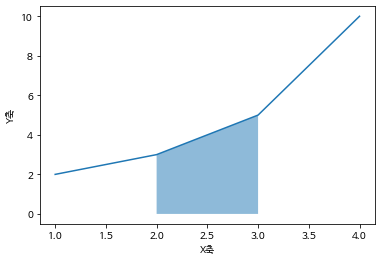

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 3, 5, 10]

plt.plot(x, y)
plt.xlabel("X축")
plt.ylabel("Y축")
plt.fill_between(x[1:3], y[1:3], alpha=0.5)
plt.show()

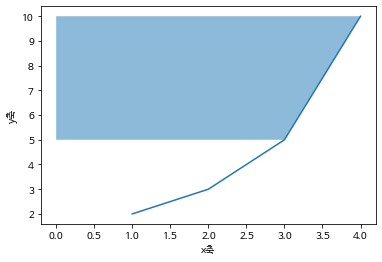

In [ ]:
x = [1, 2, 3, 4]
y = [2, 3, 5, 10]

plt.plot(x, y)
plt.xlabel("x축")
plt.ylabel("y축")
plt.fill_betweenx(y=y[2:4], x1=x[2:4], alpha=0.5)

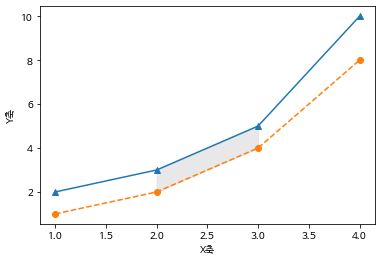

In [ ]:
x = [1, 2, 3, 4]
y1 = [2, 3, 5, 10]
y2 = [1, 2, 4, 8]

plt.plot(x, y1, marker='^')
plt.plot(x, y2, marker='o', linestyle='dashed')
plt.xlabel("X축")
plt.ylabel("Y축")
plt.fill_between(x[1:3], y1[1:3], y2[1:3], color='lightgray', alpha=0.5)
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, center_box=(-10, 10.0), shuffle=True, random_state=0)
range_n_clusters = [2, 3 ,4, 5, 6]

for n_cluster in range_n_clusters:
  # Create a subplt with 1 rows and 2 columns
  fig, (ax1, ax2) = plt.subplots(1, 2)

  # The 1st subplot is the silhouette plot
  # The silhouette coefficent can range from -1 , 1 but in this example all lie within -0.1, 1
  ax1.set_xlim([-0.1, 1])

  # The (n_cluster + 1) * 10 is for inserting blank space between silhuoette plots of individual clusters to demonstrate them clearly
  ax1.set_xlim([0, len(X) + (n_cluster + 1)*10])

  #Intialize the clusters with n_clusters values and a random generator seed of 10 for reproducibility
  cluster = KMeans(n_clusters=n_cluster, random_state=10)
  cluster_labels = cluster.fit_predict(X)

  #The silhuoette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters
  silhuoette_average = silhouette_score(X, cluster_labels)
  display(f"For n_cluster = {n_cluster}, the average silhuoette is {silhuoette_average}")

  # Compute the silhuoette scores for each samples
  # 클러스터 샘플간의 실루엣계수를 계산, 클러스간의 이질성, 특정 클러스터 내부의 포인트간의 결집성을 평가하는 척도
  samples_silhuoette_values = silhouette_samples(X, cluster_labels)

  for i in range(n_cluster):
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 2, The average silhuoette is 0.7049787496083262


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 3, The average silhuoette is 0.5882004012129721
For n_clusters = 4, The average silhuoette is 0.6505186632729437


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


For n_clusters = 5, The average silhuoette is 0.5745566973301872
For n_clusters = 6, The average silhuoette is 0.43902711183132426


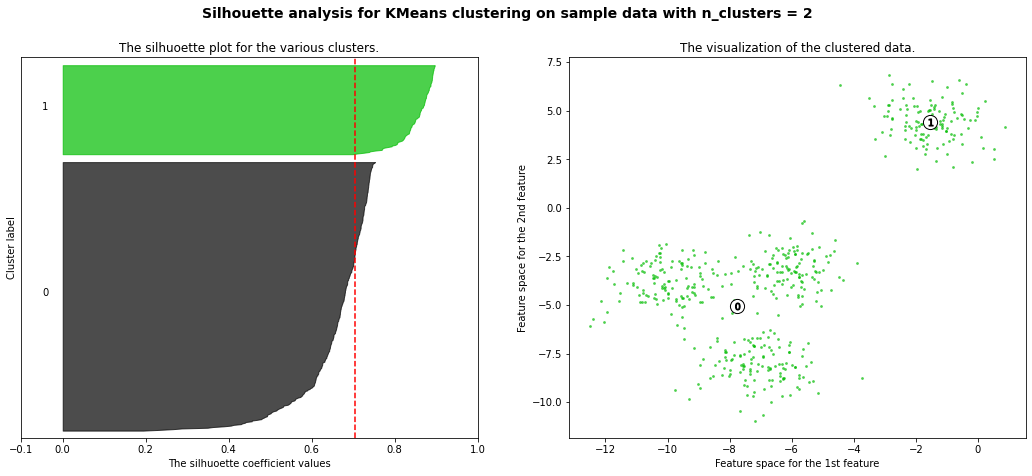

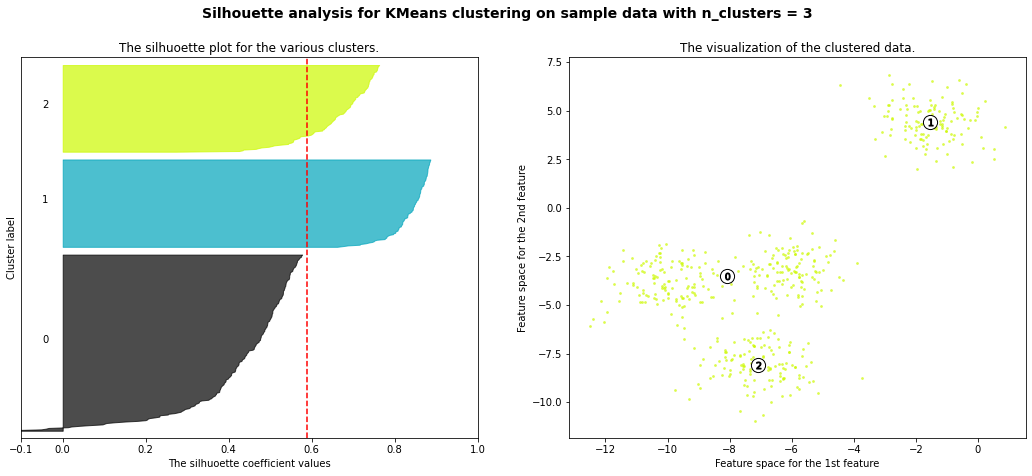

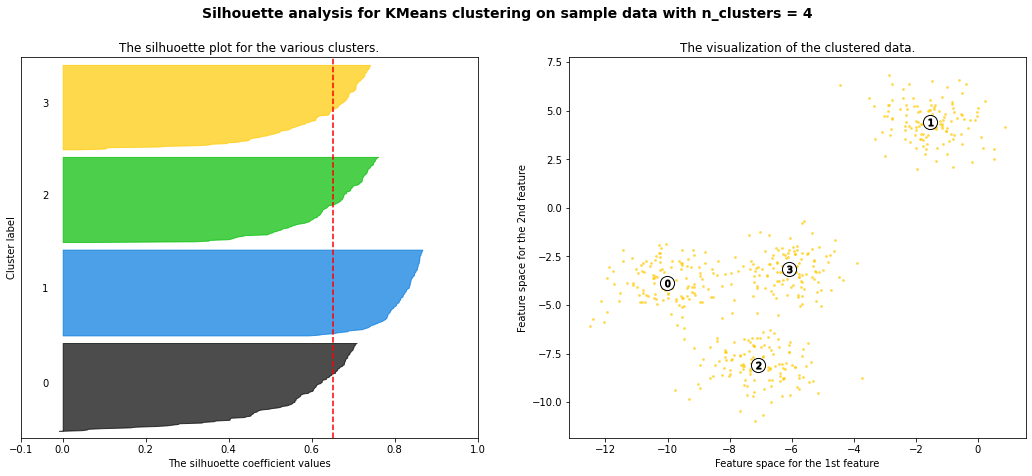

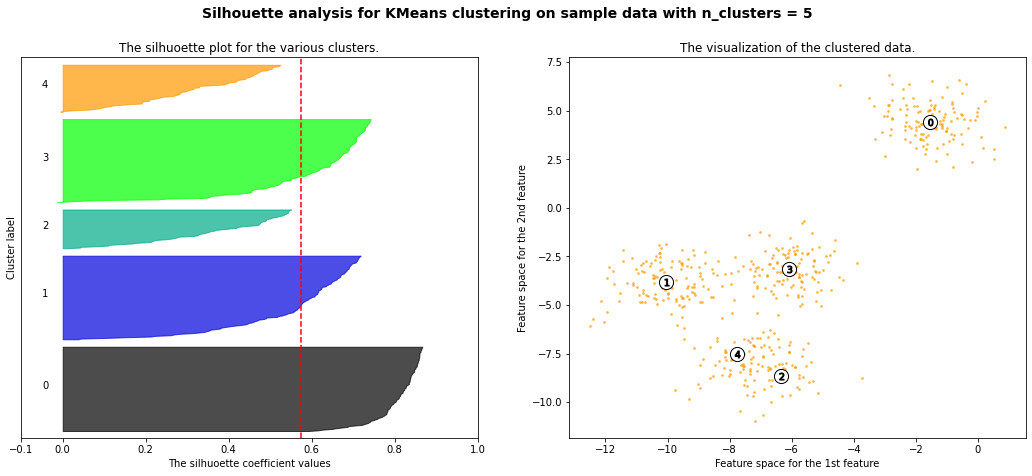

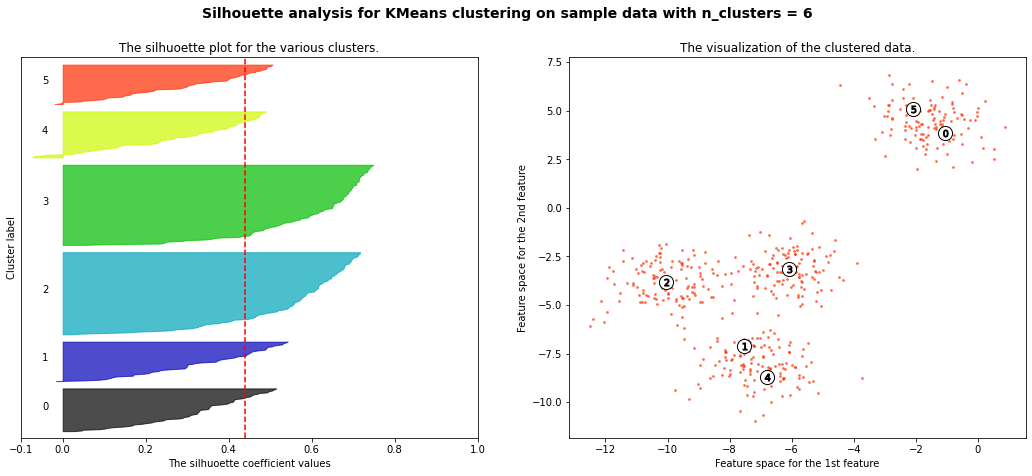

In [ ]:
X, y = make_blobs(n_samples=500,n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0),shuffle=True,random_state=1)
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st sibplot is the silhuoette plot
    # The silhuoette coefficient can range from -1, 1 but in this example all
    # Lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters + 1) * 10 is for inserting blank space between silhuoeet 
    # plots of individual clusters to demonstrate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusters with n_clusters values and a random generator 
    # seed of 10 for reproducibility.
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster.fit_predict(X)
    
    # The silhuoette_score gives the average valur for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhuoette_average = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhuoette is {silhuoette_average}")
    
    # Compute the silhuoette scores for each sample
    sample_silhuoette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhuoette scores for samples belinging to cluster i, and sort them
        ith_clusters_silhuoette_values = sample_silhuoette_values[cluster_labels == i]
        ith_clusters_silhuoette_values.sort()
        
        size_cluster_i = ith_clusters_silhuoette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        #print(np.arange(y_lower, y_upper))
        ax1.fill_betweenx(np.arange(y_lower,  y_upper), 0, ith_clusters_silhuoette_values,facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhuoette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhuoette plot for the various clusters.")
    ax1.set_xlabel("The silhuoette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhuoette score of all the values
    ax1.axvline(x=silhuoette_average, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker=".", s = 30, lw=0, alpha=0.7, c=color, edgecolor='k')
    
    # Lebeling the clusters
    centers = cluster.cluster_centers_  # 중심점
    
    # Draw write circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')
plt.show()

### 클러스터별 평균 실루엣 계수의 시각화를 통한 클러스터 개수 최적화 방법

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

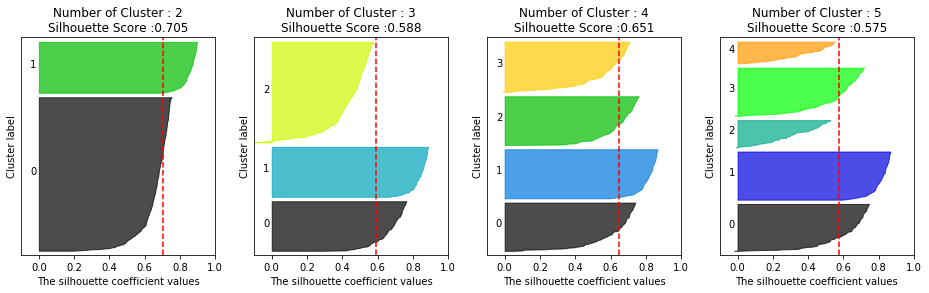

In [ ]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

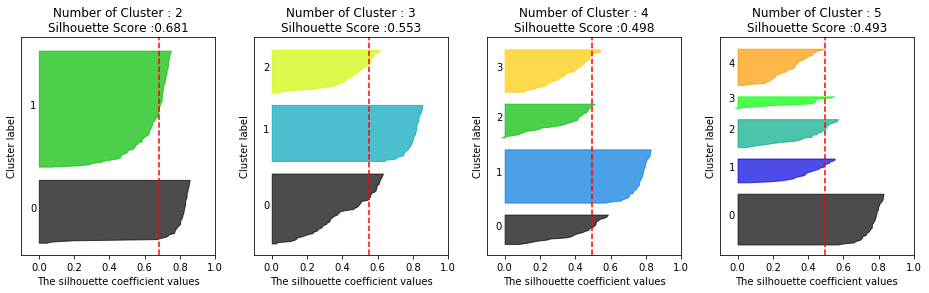

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([ 2, 3, 4,5 ], iris.data)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


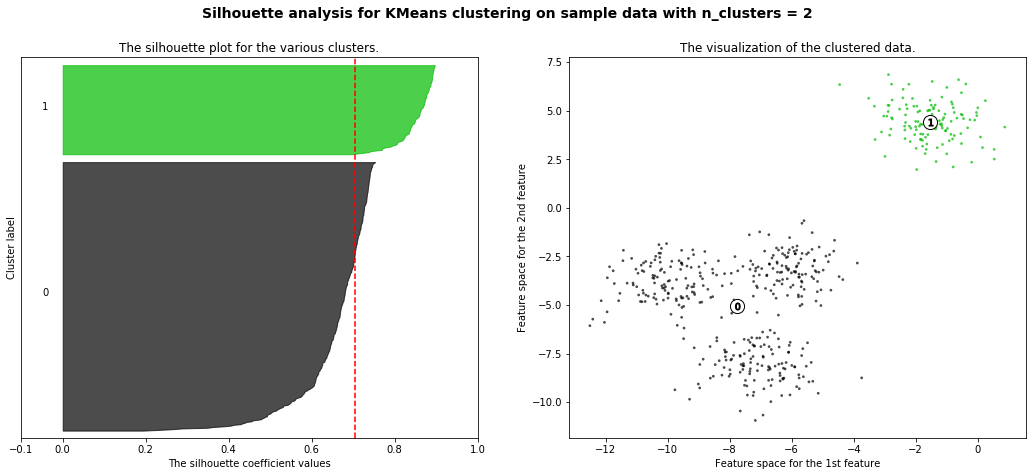

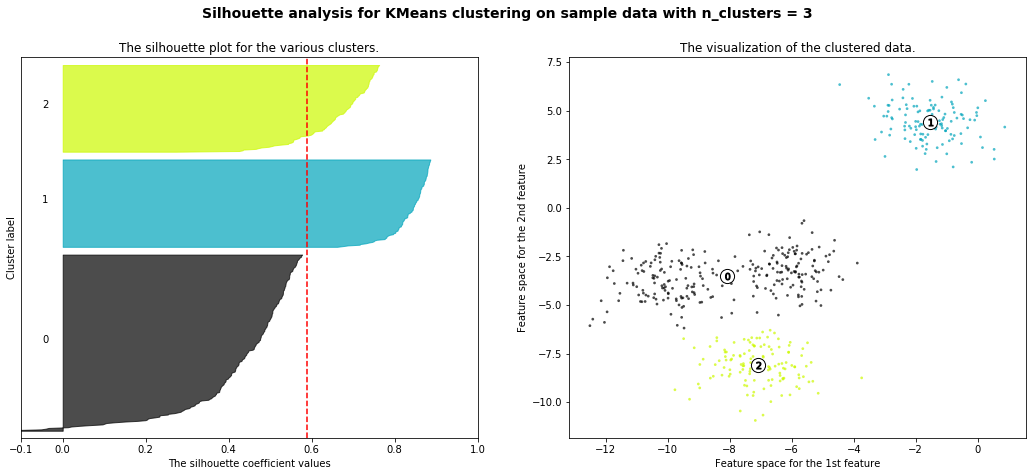

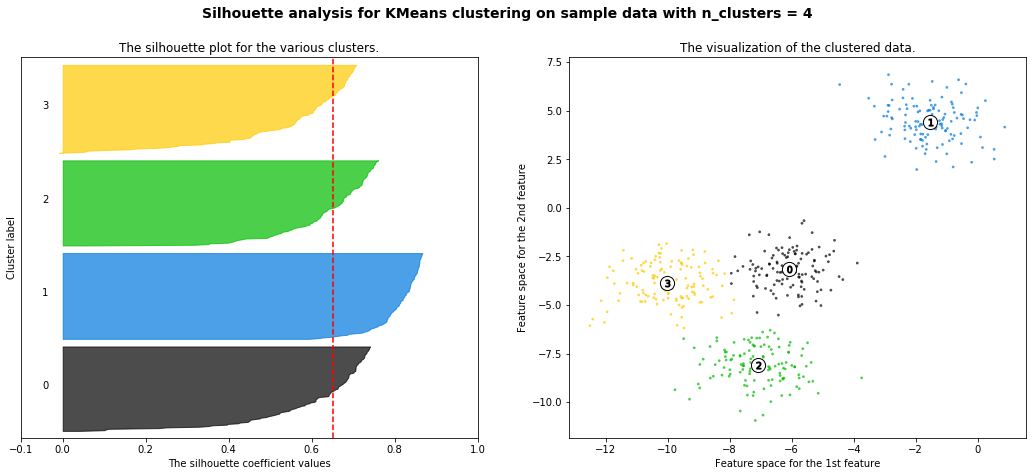

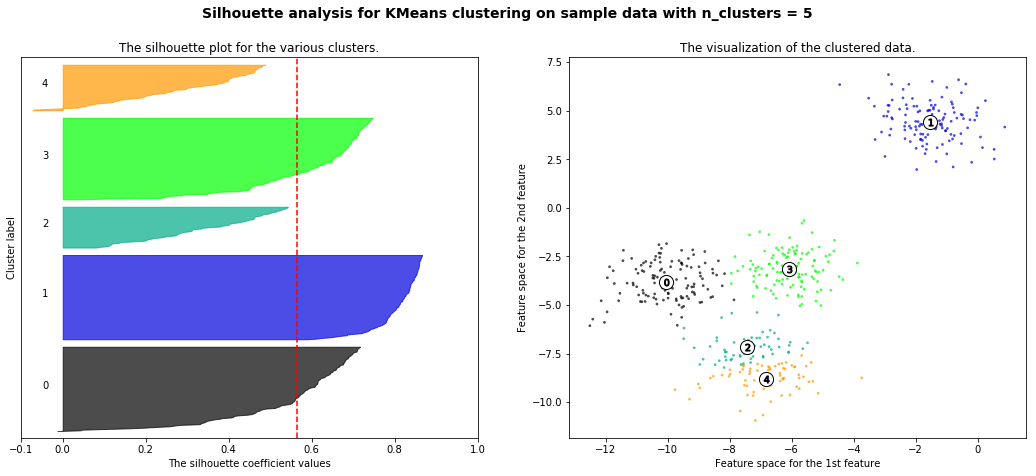

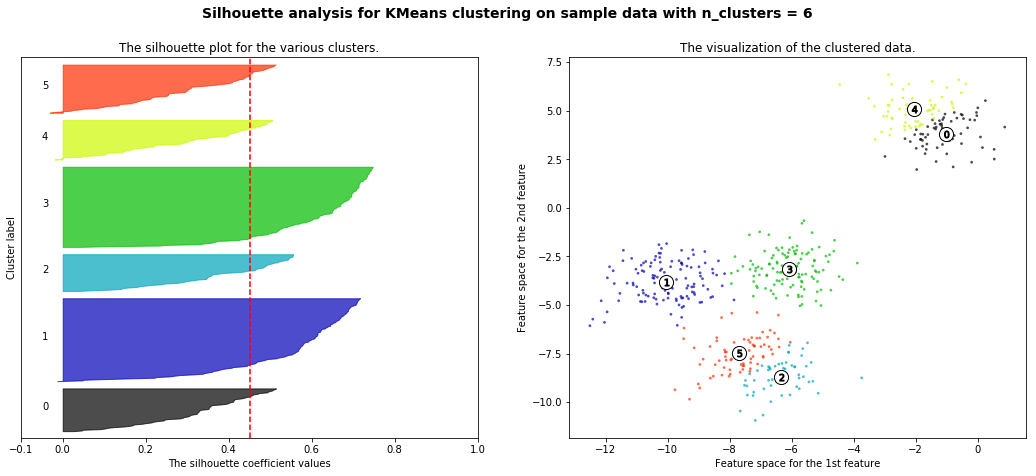

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()